<a href="https://colab.research.google.com/github/innocence112/DictionaryLearningTutorial/blob/main/DictionaryLearningTutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 准备环境
  安装scikit-learn

In [1]:
!pip install scikit-learn

# 2. 导入库

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import DictionaryLearning

# 3. 生成数据
创建一些简单的2D数据，作为学习字典的输入数据

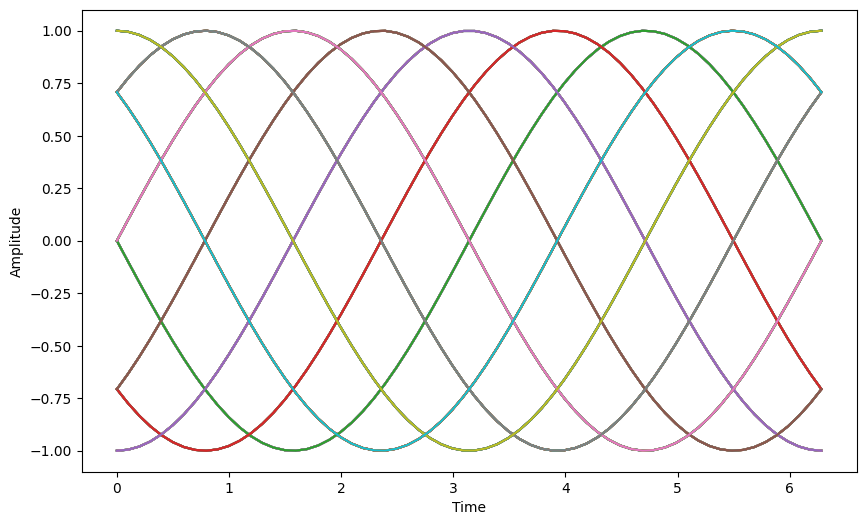

In [3]:
# 生成一个简单的正弦信号数据
n_samples = 100
n_features = 64

# 创建样本 - 使用正弦函数来生成类似信号的样本
t = np.linspace(0, 2 * np.pi, n_features)
data = np.array([np.sin(t + i * np.pi / 4) for i in range(n_samples)])
plt.figure(figsize=(10, 6))
for i in range(n_samples):
    plt.plot(t, data[i])
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

# 4. 字典学习
使用scikit-learn的DictionaryLearning来进行字典学习。设置n_components来定义字典中原子的数量，以及alpha来控制稀疏性。

1. **Fit the Model:** We first need to fit the DictionaryLearning model to the data using the fit method. This step learns the dictionary from the provided data. Alternatively, you could use fit_transform which combines fitting and transforming into a single step and returns the sparse code.
2. **Access components_:** The learned dictionary is stored in the components_ attribute (note the trailing underscore), not components. We access it after fitting the model.
3. **Get transformed data:** Since you were originally using fit_transform, you will need to now use transform to obtain the sparse code (dict_codes) after fitting the model separately.

In [4]:
# 创建字典学习模型
n_components = 16  # 字典中的原子数量
alpha = 1  # 控制稀疏性的正则化参数

dict_learner = DictionaryLearning(n_components=n_components, alpha=alpha, fit_algorithm='lars', transform_algorithm='lasso_lars')
dict_codes = dict_learner.fit_transform(data)
dictionary = dict_learner.components_


# 5. 查看字典
可以查看学习到的字典，看看每个原子的样子。

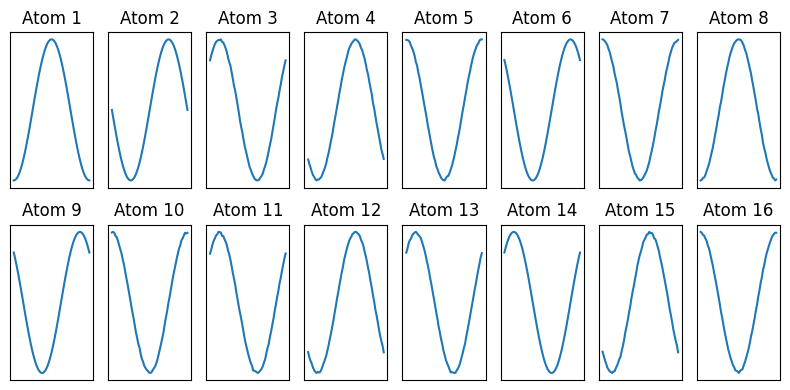

In [5]:
# 绘制字典的每个原子
plt.figure(figsize=(8, 4))
for i, atom in enumerate(dictionary):
    plt.subplot(2, 8, i + 1)
    plt.plot(atom)
    plt.xticks([])
    plt.yticks([])
    plt.title(f'Atom {i+1}')
plt.tight_layout()
plt.show()


# 6. 稀疏编码
使用学习到的字典对原始数据进行稀疏编码。

In [6]:
# 将数据用字典进行编码
sparse_codes = dict_learner.transform(data)


# 7. 重构数据和计算误差
用字典和稀疏编码重构原始数据，观察重构误差。

Reconstruction Error: 0.0156


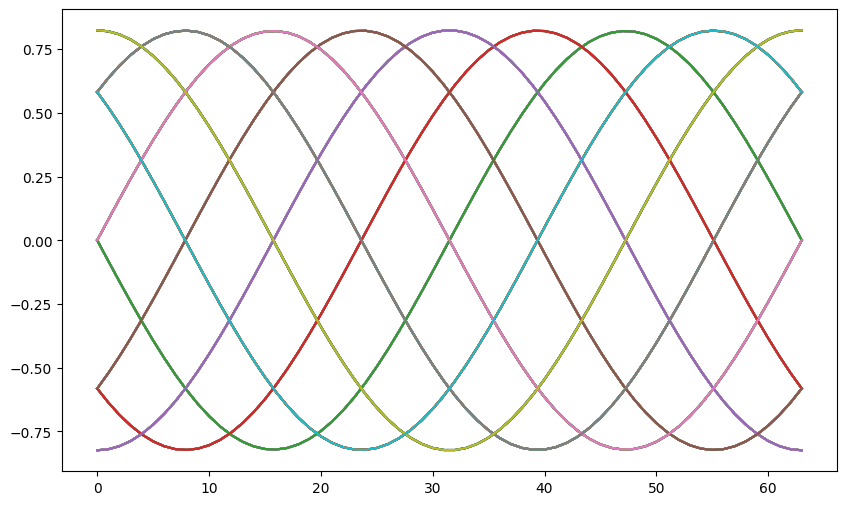

In [7]:
# 重构数据
reconstructed_data = np.dot(sparse_codes, dictionary)
plt.figure(figsize=(10, 6))
for i in range(n_samples):
    plt.plot(reconstructed_data[i], label=f'Sample {i+1}')

# 计算重构误差
reconstruction_error = np.mean((data - reconstructed_data) ** 2)
print(f'Reconstruction Error: {reconstruction_error:.4f}')


# 8. 将构造的输入数据更改为图片，利用字典学习实现重构
## 8.1 准备图像数据
假设我们使用灰度图像，这样每个像素点只有一个灰度值（0到255），可以表示成一个二维矩阵。

In [1]:
!pip install --upgrade numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 21.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cupy-cuda12x 12.2.0 requires numpy<1.27,>=1.20, but you have numpy 2.1.3 which is incompatible.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.1.3 which is incompatible.
langchain 0.3.7 requires numpy<2,>=1; python_version < "3.12", but you have numpy 2.1.3 which is incompatible.
matplotlib 3.8.0 requires numpy<2,>=1.21, but you have numpy 2.1.3 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.1.3 which is incompatible.
pytensor 2.25.5 requires numpy<2,>=1.17.

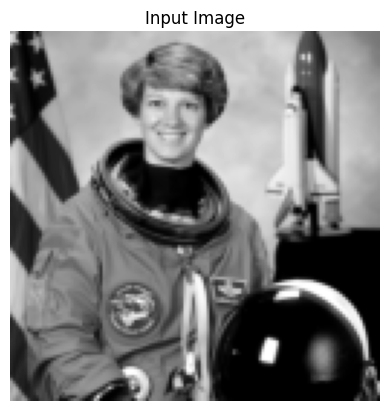

In [3]:
%pip install numpy==1.26.4
import numpy as np
from sklearn.feature_extraction import image
from sklearn.decomposition import DictionaryLearning
import matplotlib.pyplot as plt
from skimage import data, color
from skimage.transform import resize

# 使用 skimage 自带的示例图像，比如相对简单的 "astronaut" 图像
# 将图像转换为灰度并调整大小以降低计算复杂度
image_input = color.rgb2gray(data.astronaut())
image_input = resize(image_input, (128, 128))  # 调整为128x128大小

# 显示图像
plt.imshow(image_input, cmap='gray')
plt.title('Input Image')
plt.axis('off')
plt.show()


## 8.2 将图像分割成小块 (patches)
为了进行字典学习，我们将图像分割成小块（比如 8x8 的小块），并将每个小块展平为向量。

In [4]:
# 提取 8x8 的小块
patch_size = (8, 8)
patches = image.extract_patches_2d(image_input, patch_size)
# 将每个 8x8 的小块展平为一维向量
patches = patches.reshape(patches.shape[0], -1)


## 8.3 应用字典学习
使用这些展平的小块作为字典学习的输入。

In [8]:
!pip install cupy-cuda12x --upgrade --force-reinstall

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.6/90.6 MB 42.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 53.3 MB/s eta 0:00:00
  Attempting uninstall: fastrlock
    Found existing installation: fastrlock 0.8.2
    Uninstalling fastrlock-0.8.2:
      Successfully uninstalled fastrlock-0.8.2
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: cupy-cuda12x
    Found existing installation: cupy-cuda12x 12.2.0
    Uninstalling cupy-cuda12x-12.2.0:
      Successfully uninstalled cupy-cuda12x-12.2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu11 24.10.1 requires cupy-cuda11x>=12.0.0, which is not installed.
dask-cudf-cu11 24.10.1 requires cupy-cuda11x>=12.0.0, which is not installed.
cudf-cu11 24.10.1 requ

In [7]:
import cupy as cp
patches_gpu = cp.asarray(patches) # 将 patches 数据转移到 GPU

AttributeError: module 'cupy' has no attribute 'asarray'

In [8]:
!pip install cuml-cu12 --extra-index-url=https://pypi.nvidia.com

Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com


In [10]:
from cuml.decomposition import DictionaryLearning

# 定义字典学习模型
n_components = 100  # 选择字典中的原子数量
dict_learner = DictionaryLearning(n_components=n_components, transform_algorithm='omp', transform_n_nonzero_coefs=5, random_state=0)

# 训练字典
dict_learner.fit(patches_gpu)

# 获取学习到的字典
dictionary_gpu = dict_learner.components_

# 将字典转移回 CPU
dictionary = cp.asnumpy(dictionary_gpu)  # 将字典转移回 CPU

# 可视化学习到的字典原子（每个原子也是一个 8x8 小块）
fig, axes = plt.subplots(10, 10, figsize=(8, 8))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(dictionary[i].reshape(patch_size), cmap='gray')
    ax.axis('off')
plt.suptitle('Learned Dictionary Atoms')
plt.show()


SyntaxError: invalid syntax (<ipython-input-10-3592bd5cedba>, line 1)